In [1]:
from sklearn.svm import SVC
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import datetime 
import numpy as np
import json
import jpype
from konlpy.tag import Okt
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_excel('master_data.xlsx')
data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)

In [3]:
rdata = pd.read_excel('가독성지수3.xlsx')
data = pd.merge(data,rdata, on='제목')

In [4]:
data['펀딩기간'] = (data['펀딩마감날짜'] - data['펀딩시작날짜'])
data['펀딩기간'] = data.펀딩기간.dt.days

data = data[data['펀딩기간']!=0]

data['일펀딩금액'] = data.목표금액/data.펀딩기간
data['일글수'] = data.글업데이트수/data.펀딩기간

data['문장당강조'] = data.Strong/data.문장수
data['문장당밑줄']= data.Under/data.문장수
data['문장지수'] = data.문장당강조 + data.문장당밑줄
# 좋아요 댓글 서포터 시각화 빼기
data['시각화지수'] = data.좋아요수 + (data.이미지수*10) + (100 - data.비디오수*10)

In [5]:
data['과거프로젝트수'] = data.과거프로젝트수 + 1


data = data[(data.과거성공프로젝트수/data.과거프로젝트수)<=1]

data['성공비율'] = data.과거성공프로젝트수/data.과거프로젝트수

In [6]:
data = data[data.일펀딩금액>0]

# 무한대값 제거
data = data.replace([np.inf, -np.inf], np.nan)
data = data[~(data.가독성_제목.isnull())]

In [7]:
data = data[data['이미지수']<=80]
data = data[data['비디오수']<=10]
data = data[(data.리워드종류수!=30) & (data.리워드종류수 !=26) & (data.리워드종류수 !=35) & (data.리워드종류수 !=32) & (data.리워드종류수 !=39) &
            (data.리워드종류수 !=19) & (data.리워드종류수 !=35) & (data.리워드종류수 !=36) & (data.리워드종류수 !=24)]
data = data[(data.마감배송차이>0) & (data.마감배송차이<300)]

In [8]:
# 필요한 컬럼만 추출

total = data[['목표금액', '리워드종류수', 
       '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2',
       '제목단어수', '달성률', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액',
       '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율','시각화지수']]




# 일단 하면 성능좋아져서 했음


<Figure size 2880x2880 with 0 Axes>

(array([2.388e+03, 1.966e+03, 5.700e+02, 8.500e+01, 2.200e+01, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '리워드종류수')

(array([ 138., 1250., 1909.,  813.,  557.,  243.,   79.,   31.,   11.,
           7.]),
 array([  5. ,  21.6,  38.2,  54.8,  71.4,  88. , 104.6, 121.2, 137.8,
        154.4, 171. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '마감배송차이')

(array([1373.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3665.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '인스타존재여부')

(array([4.802e+03, 1.730e+02, 2.900e+01, 2.100e+01, 1.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([    0.,  9260., 18520., 27780., 37040., 46300., 55560., 64820.,
        74080., 83340., 92600.]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '인스타팔로워수')

(array([4.638e+03, 2.080e+02, 9.300e+01, 2.100e+01, 3.400e+01, 4.100e+01,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  26.4,  52.8,  79.2, 105.6, 132. , 158.4, 184.8, 211.2,
        237.6, 264. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '와디즈팔로워수')

(array([3843.,  649.,  212.,  162.,   49.,   65.,   15.,    0.,   19.,
          24.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '과거프로젝트수')

(array([4616.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         422.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '앵콜펀딩여부')

(array([1226., 1903., 1167.,  462.,  177.,   66.,   22.,    8.,    4.,
           3.]),
 array([ 1006.,  2136.,  3266.,  4396.,  5526.,  6656.,  7786.,  8916.,
        10046., 11176., 12306.]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '음절수')

(array([1.177e+03, 1.951e+03, 1.183e+03, 4.600e+02, 1.760e+02, 5.500e+01,
        2.300e+01, 9.000e+00, 1.000e+00, 3.000e+00]),
 array([ 529. , 1170.7, 1812.4, 2454.1, 3095.8, 3737.5, 4379.2, 5020.9,
        5662.6, 6304.3, 6946. ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, '단어수')

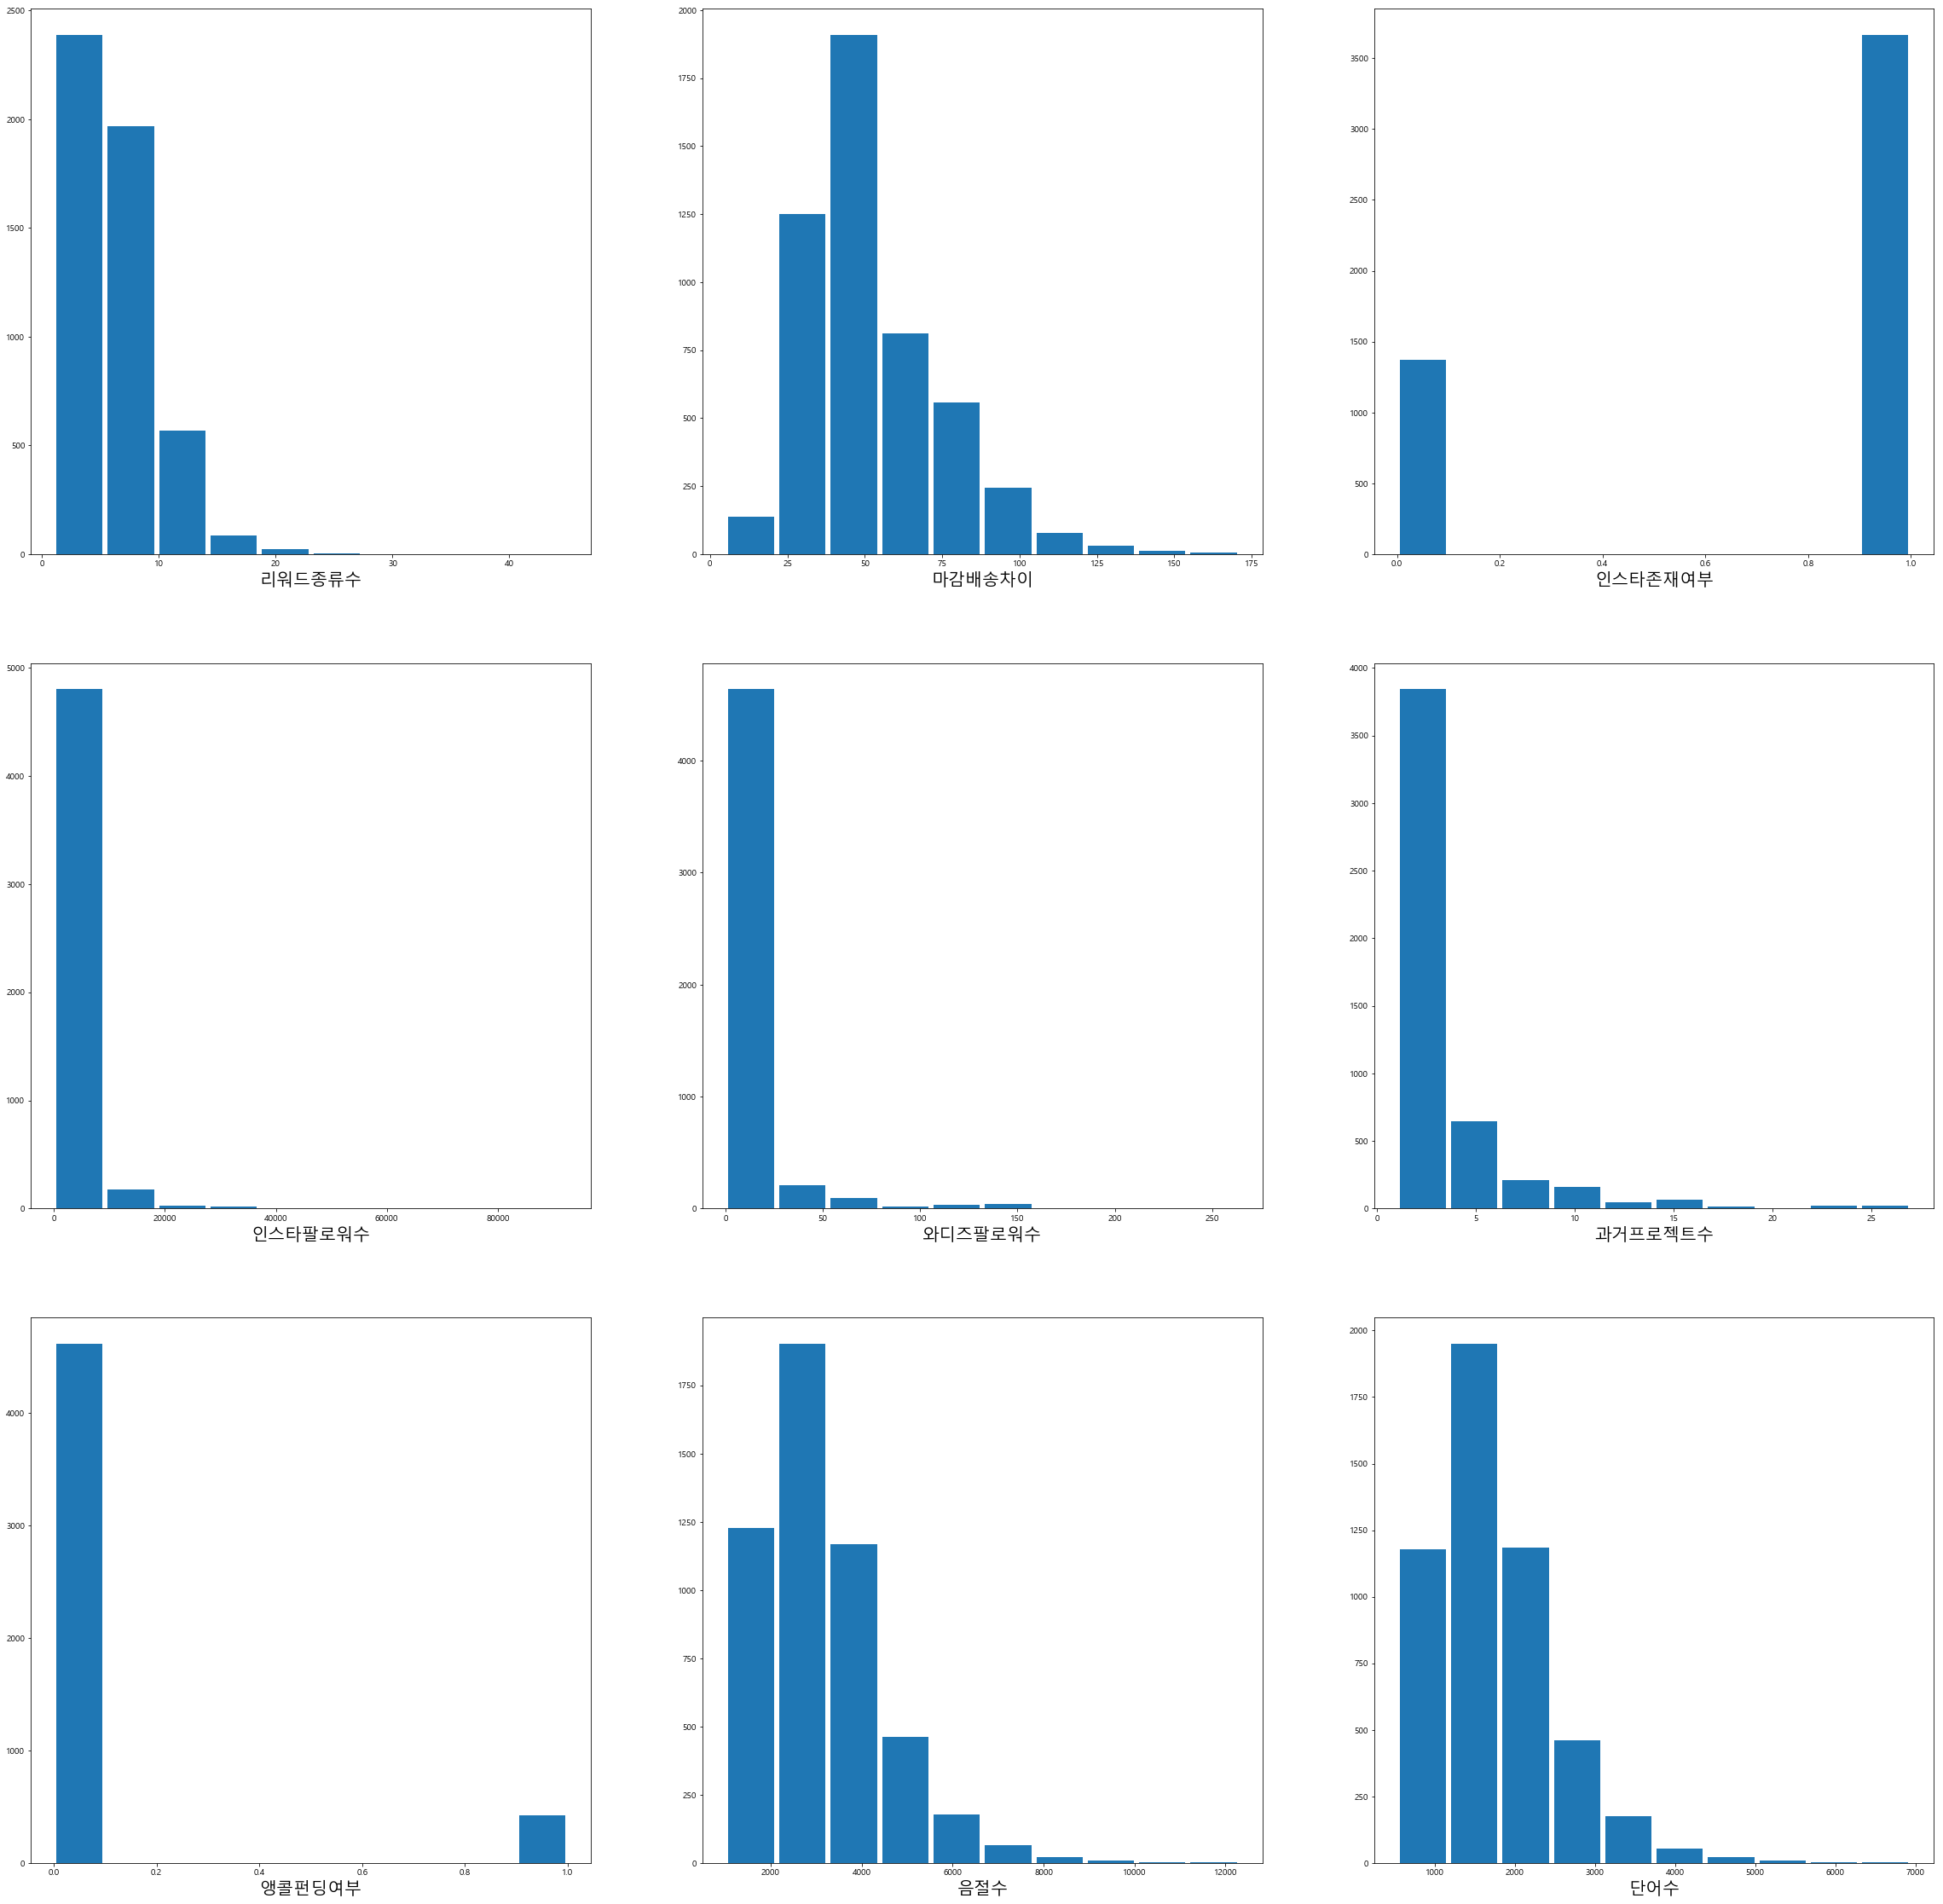

In [9]:
plt.figure(figsize=(40,40))
total_list = total.columns
for i in range(1,10,1):
    plt.subplot(330+i)
    plt.hist(total[total_list[i]],rwidth=0.9)
    plt.xlabel(total_list[i],fontsize=20)

In [10]:
# 달성률 범주생성
# 현재 범주는 임의의 범주이며
# 여러가지 시도하면서 정확도를 봐야할듯

total.index = list(range(len(total)))
total_target = total

target_list = []

for i in range(len(total_target)):
    if total_target.달성률[i] < 100:
        target_list.append(0)
    elif total_target.달성률[i] < 850:
        target_list.append(1)     
    
    else:
        target_list.append(3)
    
total_target['타겟'] = target_list
total_target.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')
total_data = total_target.drop(columns = ['달성률'])

C:\Users\freez\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,달성률
타겟,
0,1090
1,2712
3,1236


In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
X = total_data.drop(columns=['타겟'])
y = total_data.타겟
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [12]:
## Create a linear SVM classifier 
#clf = svm.SVC(kernel='linear')
## Train classifier 
#clf.fit(X_train, y_train)
#clf_predictions = clf.predict(X_test)
#print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

In [13]:
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\freez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.53


In [15]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최대값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
목표금액        0.0
리워드종류수      0.0
마감배송차이      0.0
인스타존재여부     0.0
인스타팔로워수     0.0
와디즈팔로워수     0.0
과거프로젝트수     0.0
앵콜펀딩여부      0.0
음절수         0.0
단어수         0.0
문장수         0.0
Strong      0.0
Under       0.0
가독성         0.0
가독성2        0.0
제목단어수       0.0
디자인소품       0.0
반려동물        0.0
뷰티          0.0
스포츠·모빌리티    0.0
여행·레저       0.0
테크·가전       0.0
패션·잡화       0.0
푸드          0.0
홈리빙         0.0
Fri         0.0
Mon         0.0
Sat         0.0
Sun         0.0
Thu         0.0
Tue         0.0
Wed         0.0
음절수_제목      0.0
단어수_제목      0.0
문장수_제목      0.0
가독성_제목      0.0
가독성_제목.1    0.0
펀딩기간        0.0
일펀딩금액       0.0
일글수         0.0
문장당강조       0.0
문장당밑줄       0.0
문장지수        0.0
성공비율        0.0
시각화지수       0.0
dtype: float64
특성별 최대 값
 목표금액        1.0
리워드종류수      1.0
마감배송차이      1.0
인스타존재여부     1.0
인스타팔로워수     1.0
와디즈팔로워수     1.0
과거프로젝트수     1.0
앵콜펀딩여부      1.0
음절수         1.0
단어수         1.0
문장수         1.0
Strong      1.0
Under       1.0
가독성         1.0
가독성2        1.0
제목단어수 

In [16]:
len(X_train_scaled)

3526

In [17]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다).
X_test_scaled = (X_test - min_on_training) / range_on_training

In [18]:
len(X_test_scaled)

1512

In [19]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

C:\Users\freez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

훈련 세트 정확도: 0.704
테스트 세트 정확도: 0.687


In [20]:
svc = SVC(C=770)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

C:\Users\freez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=770, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

훈련 세트 정확도: 0.886
테스트 세트 정확도: 0.817


In [21]:
# 시각화지수 없을때 77.6 , 77.7퍼
# 시각화지수 있을떄 C = 800 : 81.7퍼

In [22]:
# https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-7-%EC%BB%A4%EB%84%90-%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0/

In [23]:
# https://www.learnopencv.com/svm-using-scikit-learn-in-python/

In [24]:
# https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn